In [1]:
### Economic Development Capstone

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import hashlib
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import statistics

%matplotlib inline

pd.options.display.float_format = '{:.2f}'.format #Stop displaying scientific notation

### Load Data:

In [2]:
df_suc = pd.read_csv("edp_closed.csv") #Closed projects
df_can = pd.read_csv("edp_cancelled.csv") #Cancelled projects
df_wip = pd.read_csv("edp_under_contract.csv") #Projects in progress

### Rename Columns

In [3]:
#Successful Projects
df_suc.rename({'Company Name': 'company_name', 'County': 'county', 'City':'city', 'Status': 'status', 'Program':'program', 'Primary Funding Agreement':'primary_funding',
              'Award Date':'award_date', 'Total Project Cost':'total_project_cost', 'Capital Investment':'company_funding',
              'Direct Assistance Awarded':'direct_assistance_awarded','Tax Benefits Awarded':'tax_benefits_awarded',
              'Projected Jobs - Created':'projected_jobs_created', 'Projected Jobs - Retained':'projected_jobs_retained', 'Projected Jobs - Other': 'p_jobs_other', 'Projected Jobs - Total': 'p_jobs_total',
              'Projected Qualifying Wage': 'p_qualwage', 'Contracted Jobs - Created':'cont_jobs_created',
              'Contracted Jobs - Retained':'cont_jobs_retained', 'Contracted Jobs - Other Created':'cont_jobs_othercreated',
              'Contracted Jobs - Total':'cont_jobs_total', 'Contracted Qualifying Wage':'cont_qualwage',
              'Verified Total Project Cost':'verified_total_project_cost', 'Project Completion Date':'project_completion_date',
              'Final Jobs - Created':'final_jobs_created', 'Final Jobs - Retained':'final_jobs_retained',
              'Final Jobs - Other Created':'final_jobs_other_created', 'Final Jobs - Total':'final_jobs_total',
              'Project Maintenance Date':'project_maintenance_date', 'City Coordinates':'city_coordinates'}, axis=1, inplace=True)

In [4]:
#Cancelled/Failured Projects
df_can.rename({'Company Name': 'company_name', 'County': 'county', 'City':'city', 'Status': 'status', 'Program':'program', 'Primary Funding Agreement':'primary_funding',
              'Award Date':'award_date', 'Total Project Cost':'total_project_cost', 'Capital Investment':'company_funding',
              'Direct Assistance Awarded':'direct_assistance_awarded','Tax Benefits Awarded':'tax_benefits_awarded',
              'Projected Jobs - Created':'projected_jobs_created', 'Projected Jobs - Retained':'projected_jobs_retained', 'Projected Jobs - Other': 'p_jobs_other', 'Projected Jobs - Total': 'p_jobs_total',
              'Projected Qualifying Wage': 'p_qualwage', 'Contracted Jobs - Created':'cont_jobs_created',
              'Contracted Jobs - Retained':'cont_jobs_retained', 'Contracted Jobs - Other Created':'cont_jobs_othercreated',
              'Contracted Jobs - Total':'cont_jobs_total', 'Contracted Qualifying Wage':'cont_qualwage',
              #'Verified Total Project Cost':'verified_total_project_cost', 'Project Completion Date':'project_completion_date',
              #'Final Jobs - Created':'final_jobs_created', 'Final Jobs - Retained':'final_jobs_retained',
              #'Final Jobs - Other Created':'final_jobs_other_created', 'Final Jobs - Total':'final_jobs_total',
              #'Project Maintenance Date':'project_maintenance_date',
            'City Coordinates':'city_coordinates'}, axis=1, inplace=True)

In [5]:
#In-Progress Projects
#Note contacted qualifying wage instead of contracted
df_wip.rename({'Company Name': 'company_name', 'County': 'county', 'City':'city', 'Status': 'status', 'Program':'program', 'Primary Funding Agreement':'primary_funding',
              'Award Date':'award_date', 'Total Project Cost':'total_project_cost', 'Capital Investment':'company_funding',
              'Direct Assistance Awarded':'direct_assistance_awarded','Tax Benefits Awarded':'tax_benefits_awarded',
              'Projected Jobs - Created':'projected_jobs_created', 'Projected Jobs - Retained':'projected_jobs_retained', 'Projected Jobs - Other': 'p_jobs_other',
              'Projected Jobs - Total': 'p_jobs_total',
              'Projected Qualifying Wage': 'p_qualwage', 'Contracted Jobs - Created':'cont_jobs_created',
              'Contracted Jobs - Retained':'cont_jobs_retained', 'Contracted Jobs - Other Created':'cont_jobs_othercreated',
              'Contracted Jobs - Total':'cont_jobs_total', 'Contacted Qualifying Wage':'cont_qualwage',
              'Verified Total Project Cost':'verified_total_project_cost', 'Project Completion Date':'project_completion_date',
              'Final Jobs - Created':'final_jobs_created', 'Final Jobs - Retained':'final_jobs_retained',
              'Final Jobs - Other Created':'final_jobs_other_created', 'Final Jobs - Total':'final_jobs_total',
              'Project Maintenance Date':'project_maintenance_date', 'City Coordinates':'city_coordinates',
              'Date Reported':'date_reported',
              'Project Completion Jobs - Created':'end_of_project_completion_jobs_created',
                'Project Completion Jobs - Retained':'end_of_project_completion_jobs_retained',
                'Project Completion Jobs - Other Created':'end_of_project_completion_jobs_others_created',
                'Project Completion Jobs - Total':'end_of_project_completion_jobs_total',
                'Reported Jobs - Created':'reported_jobs_created',
                'Reported Jobs - Retained':'reported_jobs_retained',
                'Reported Jobs - Other Created':'reported_jobs_others_created',
                'Reported Jobs - Total':'reported_jobs_total',}, axis=1, inplace=True)
#print(df_wip.columns)

In [6]:
# Adding new columns
df_suc['project_type'] = '2' #Success = 2
df_can['project_type'] = '0' #Cancelled = 0
df_wip['project_type'] = '1' #WIP = 1

In [7]:
#Create our df by merging the 3 together
df = pd.concat([df_suc, df_can, df_wip]).copy() #Merge the 3 dataframes together

In [8]:
pd.set_option('display.max_columns', None)
df.head(5)

,company_name,county,city,status,program,primary_funding,award_date,total_project_cost,company_funding,direct_assistance_awarded,tax_benefits_awarded,projected_jobs_created,projected_jobs_retained,p_jobs_other,p_jobs_total,p_qualwage,cont_jobs_created,cont_jobs_retained,cont_jobs_othercreated,cont_jobs_total,cont_qualwage,verified_total_project_cost,project_completion_date,final_jobs_created,final_jobs_retained,final_jobs_other_created,final_jobs_total,project_maintenance_date,city_coordinates,project_type,end_of_project_completion_jobs_created,end_of_project_completion_jobs_retained,end_of_project_completion_jobs_others_created,end_of_project_completion_jobs_total,reported_jobs_created,reported_jobs_retained,reported_jobs_others_created,reported_jobs_total,date_reported
0,"DHI Group Inc. (f/k/a Dice Career Solutions, I...",Polk,Urbandale,Closed Contracts - Successful,130% Component,11-130-015,11/18/2010,1750000,1750000,225000,0,16,154,0,170,23.20,16,90,0,106,23.20,5127664.00,11/30/2013,16.00,90.00,0.00,106.00,11/30/2015,POINT (-93.736522 41.630343),2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Wacker Chemical Corporation,Monroe,Eddyville,Closed Contracts - Successful,130% Component,12-130-012,11/18/2011,7706860,7706860,150000,344047,3,13,0,16,21.36,3,13,0,16,21.36,7746970.00,11/30/2014,3.00,13.00,0.00,16.00,11/30/2016,POINT (-92.630188 41.158178),2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Environmental Lubricants Manufacturing, Inc.",Grundy,Grundy Center,Closed Contracts - Full,Value-Added Agriculture Component,11-VAAC-013,05/19/2011,415000,415000,60000,0,0,0,0,0,0.00,0,0,0,0,0.00,0.00,06/30/2017,0.00,0.00,0.00,0.00,06/30/2019,POINT (-92.768301 42.361475),2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,McKesson Corporation,Cerro Gordo,Clear Lake,Closed Contracts - Successful,High Quality Jobs Program,15-HQJDF-034,02/20/2015,65242000,65242000,170000,4200000,164,0,0,164,14.79,164,0,0,164,14.79,70955084.00,02/28/2018,164.00,0.00,0.00,164.00,02/28/2020,POINT (-93.378746 43.137357),2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Peregrine Financial Group, Inc.",Black Hawk,Cedar Falls,Bankruptcy,Community Economic Betterment Account,07-CEBA-044,06/13/2007,13030000,11650000,350000,893063,41,0,12,53,21.38,0,1,89,90,21.38,0.00,06/30/2010,0.00,0.00,0.00,0.00,06/30/2012,POINT (-92.4534 42.537809),2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Drop columns we don't need
df.drop(columns=['p_jobs_total', 'program', 'company_name', 'county', 'city', 'verified_total_project_cost', 'project_completion_date', 'final_jobs_created',
                 'final_jobs_retained', 'final_jobs_other_created', 'final_jobs_total',
                 'project_maintenance_date', 'end_of_project_completion_jobs_created',
                 'end_of_project_completion_jobs_retained', 'primary_funding',
                'end_of_project_completion_jobs_others_created',
                'end_of_project_completion_jobs_total', 'reported_jobs_created',
                'reported_jobs_retained', 'reported_jobs_others_created',
                'date_reported', 'status', 'award_date', 'project_completion_date', 'city_coordinates',
                'projected_jobs_created', 'projected_jobs_retained', 'p_jobs_other', 'p_qualwage',
                'cont_jobs_created', 'cont_jobs_retained', 'cont_jobs_othercreated', 'cont_qualwage', 'reported_jobs_total'], inplace=True)

In [10]:
df

,total_project_cost,company_funding,direct_assistance_awarded,tax_benefits_awarded,cont_jobs_total,project_type
0,1750000,1750000,225000,0,106,2
1,7706860,7706860,150000,344047,16,2
2,415000,415000,60000,0,0,2
3,65242000,65242000,170000,4200000,164,2
4,13030000,11650000,350000,893063,90,2
...,...,...,...,...,...,...
255,8160257,1877621,0,987132,17,1
256,4675000,4675000,176000,323000,64,1
257,3546000,3546000,500000,214800,312,1
258,60000000,48950000,0,3495000,263,1


In [11]:
df_ct = pd.read_csv("ct_data.csv")

In [12]:
#Rename columns
df_ct.rename({'Fiscal Year': 'fiscal_year', 'Company Name': 'company_name', 'Company Address':'company_address',
               'Municipality': 'municipality', 'County 1':'county', 'State':'state',
              'Zip Code':'zip_code', 'Business Industry':'company_industry', 'NAICS Code':'naics_code',
              'Minority/ Woman/ Veteran/ International Export':'min_wom_vet_int','Contract Execution Date':'contract_execution_date',
              'Grant Amount':'grant_amount', 'Loan Amount':'loan_amount',
              'Total Project Cost': 'total_project_cost','Amount Leveraged':'company_funding',
              'Funding Source':'program', 'Statutory Reference':'stat_ref',
              'Per Contract: Full-Time CT Jobs to be Retained':'p_ft_job_retention',
              'Per Contract: Full-Time CT Jobs to be Created':'p_ft_job_creation',
              'Per Contract: Part-Time CT Jobs to be Retained':'p_pt_job_retention',
              'Per Contract: Part-Time CT Jobs to be Created':'p_pt_job_creation',
              'Actual Jobs at Time of Review':'actual_jobs', 'Job Obligation Status':'job_obligation_status',
              'Penalty (if applicable)':'penalty', 'Forgiveness Earned (if applicable)':'forgiveness',
              'Per Application: Existing Full-Time Jobs in CT':'existing_ft_jobs',
              'Per Application: Full-Time Jobs to be Created in CT':'original_ft_job_creation',
              'Per Application: Existing Part-Time Jobs in CT':'existing_pt_jobs',
              'Per Application: Part Time Jobs to be Created in CT':'original_pt_job_creation',
              'Full-Time CT Employment at 6/30/20':'full_time_630',
              'Part-Time CT Employment at 6/30/20':'part_time_630',
              'Status':'status', 'Location 1':'location1', 'Count':'count',
              'Geocoded Location':'geo_location', 'Planning Regions':'planning_region',
              'Counties':'counties', 'Zip Code 2':'zipcode2', 'Town Index':'town_index',
              'Total Assistance ':'tot_assistance'
              }, axis=1, inplace=True)

In [13]:
df_ct

,fiscal_year,company_name,company_address,municipality,county,state,zip_code,company_industry,naics_code,min_wom_vet_int,contract_execution_date,grant_amount,loan_amount,tot_assistance,total_project_cost,company_funding,program,stat_ref,p_ft_job_retention,p_ft_job_creation,p_pt_job_retention,p_pt_job_creation,actual_jobs,job_obligation_status,penalty,forgiveness,existing_ft_jobs,original_ft_job_creation,existing_pt_jobs,original_pt_job_creation,full_time_630,part_time_630,status,location1,count,geo_location,planning_region,counties,zipcode2,town_index
0,2012,"Suffield Village Dental, P.C.",215 Suffield Village,Suffield,Hartford,CT,6078.00,Service,621210,No,05/17/2012,25238.00,0.00,25238.00,50476.00,25238.00,Small Business Express Program,CGS Sec. 32-7g,0,1,0,0,9,Met,NaN,NaN,7,1,0,0,NaN,NaN,Active,215 Suffield Village,1,NaN,NaN,NaN,NaN,NaN
1,2013,"Berkshire Concrete Cutting, LLC",3595 Winston Road,Torrington,Litchfield,CT,6790.00,Poured Concrete Foundation & Structure Contrac...,238110,No,09/24/2012,100000.00,0.00,100000.00,200000.00,100000.00,Small Business Express Program,CGS Sec. 32-7g,2,0,0,0,10,Met,NaN,NaN,2,0,0,0,NaN,NaN,Active,3595 Winston Road,1,NaN,NaN,NaN,NaN,NaN
2,2013,"Maritime Motors of Fairfield, Inc.",P.O. Box 118,Weare,NaN,NH,3281.00,New Car Dealers,441110,No,08/01/2012,100000.00,0.00,100000.00,533000.00,433000.00,Small Business Express Program,CGS Sec. 32-7g,46,2,0,0,50,Met,NaN,NaN,46,2,0,0,NaN,NaN,Active,P.O. Box 118,1,NaN,NaN,NaN,NaN,NaN
3,2014,"Green Power Solutions, Inc.",P.O. Box 501,Woodstock,Windham,CT,6281.00,Cleantech,238220,No,12/23/2013,0.00,100000.00,100000.00,100000.00,0.00,Small Business Express Program,CGS Sec. 32-7g,1,5,0,0,0,Not Met,from 2% to 3%,NaN,1,11,0,0,NaN,NaN,Active,P.O. Box 501,1,NaN,NaN,NaN,NaN,NaN
4,2016,"Adam Equipment, Inc.",1 Fox Hollow Road,Danbury,Fairfield,CT,6810.00,Direct Sells Marketing,454390,No,11/10/2015,100000.00,300000.00,400000.00,2931476.00,2531476.00,Small Business Express Program,CGS Sec. 32-7g,17,5,0,0,22,Met,NaN,NaN,17,6,0,0,NaN,NaN,Active,1 Fox Hollow Road,1,"1 Fox Hollow Road\r\nDanbury, CT 06810\r\n(41....",9.00,1040.00,45.00,91.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,2012,"P.S.I. Plus, Inc.",10 Bevin Road,East Hampton,Middlesex,CT,6424.00,Manufacturing,332110,No,06/26/2012,100000.00,0.00,100000.00,201000.00,101000.00,Small Business Express Program,CGS Sec. 32-7g,7,0,0,0,6,Not Met,"$1,000",NaN,7,0,0,0,NaN,NaN,Active,10 Bevin Road,1,"10 Bevin Road\r\nEast Hampton, CT 06424\r\n(41...",3.00,1043.00,273.00,42.00
2182,2015,"Concentric Tool & Manufacturing Company, Inc.",550 Spring Street,Naugatuck,New Haven,CT,6770.00,Machine Shop,332710,No,11/06/2014,100000.00,0.00,100000.00,200000.00,100000.00,Small Business Express Program,CGS Sec. 32-7g,18,3,0,0,14,Not Met,"$ 33,334.00",OOB,18,3,0,0,NaN,NaN,Out of Business- confirmed,550 Spring Street,1,"550 Spring Street\r\nNaugatuck, CT 06770\r\n(4...",4.00,1044.00,169.00,88.00
2183,2016,"U.S. Glass Distributors, Inc.",7 Niblick Road,Enfield,Hartford,CT,6082.00,Glass Manufacturer and Distributor,423120,Yes Woman,02/18/2016,0.00,300000.00,300000.00,500825.00,200825.00,Small Business Express Program,CGS Sec. 32-7g,32,3,0,0,Pending,Pending,NaN,NaN,32,3,0,0,NaN,NaN,Active,7 Niblick Road,1,"7 Niblick Road\r\nEnfield, CT 06082\r\n(41.978...",1.00,1041.00,108.00,49.00
2184,2019,"Pieszak-Miller & Brodeur, LLC","100 Essex Street 2E, P.O. Box 173",West Mystic,New London,CT,6388.00,Law Firm,541110,Yes Woman,06/04/2019,100000.00,300000.00,400000.00,500919.00,100919.00,Small Business Express Program,CGS Sec. 32-7g,7,10,0,0,Pending,Pending,NaN,NaN,7,10,0,0,4,1.00,Active,"100 Essex Street 2E, P.O. Box 173",1,"100 Essex Street 2E, P.O. Box 173\r\nWest Myst...",8.00,1045.00,135.00,59.00


In [14]:
#We have a few rows with this See EXP column. Need to remove those.

#TODO: Clean this up so that it's not brute-force.
df_ct = df_ct[df_ct['p_ft_job_creation'].str.contains("See EXP")==False]
df_ct = df_ct[df_ct['p_ft_job_creation'].str.contains("-")==False]
df_ct = df_ct[df_ct['p_ft_job_retention'].str.contains("See EXP")==False]
df_ct = df_ct[df_ct['p_pt_job_retention'].str.contains("-")==False]
df_ct = df_ct[df_ct['p_ft_job_creation'].str.contains("1,385")==False]
df_ct = df_ct[df_ct['p_ft_job_creation'].str.contains("1,385")==False]
df_ct = df_ct[df_ct['p_ft_job_retention'].str.contains("1,385")==False]
df_ct = df_ct[df_ct['p_pt_job_retention'].str.contains("1,385")==False]
df_ct = df_ct[df_ct['original_ft_job_creation'].str.contains("1,900")==False]
df_ct = df_ct[df_ct['original_pt_job_creation'].str.contains("1,900")==False]
df_ct = df_ct[df_ct['original_ft_job_creation'].str.contains("1,900")==False]
df_ct = df_ct[df_ct['original_pt_job_creation'].str.contains("1,900")==False]
df_ct = df_ct[df_ct['original_ft_job_creation'].str.contains("`0")==False]
df_ct = df_ct[df_ct['original_pt_job_creation'].str.contains("`0")==False]
df_ct = df_ct[df_ct['original_ft_job_creation'].str.contains("`0")==False]
df_ct = df_ct[df_ct['original_pt_job_creation'].str.contains("`0")==False]

In [15]:
df_ct =  df_ct[(df_ct.iloc[:, 1:] != '-').all(axis=1)]

In [16]:
df_ct['cont_jobs_total'] = df_ct['p_ft_job_creation'].astype(float) + df_ct['p_pt_job_creation'].astype(float)  + df_ct['p_ft_job_retention'].astype(float) + df_ct['p_pt_job_retention'].astype(float)
df_ct['p_jobs_total'] = df_ct['original_ft_job_creation'].astype(float) + df_ct['original_pt_job_creation'].astype(float)

In [17]:
df_ct.drop(columns=['p_jobs_total', 'program', 'fiscal_year', 'company_name', 'company_address', 'municipality', 'county', 'state',
                'zip_code', 'company_industry', 'naics_code', 'min_wom_vet_int', 'contract_execution_date',
                'stat_ref', 'p_ft_job_retention', 'p_ft_job_creation', 'actual_jobs', 'job_obligation_status',
                'penalty', 'forgiveness', 'existing_ft_jobs', 'original_ft_job_creation', 'existing_pt_jobs',
                'original_pt_job_creation', 'full_time_630', 'part_time_630', 'location1',
                'count', 'geo_location', 'planning_region', 'counties', 'zipcode2', 'town_index', 'p_pt_job_retention','p_pt_job_creation'], inplace=True)

In [18]:
df_ct.rename({'tot_assistance':'direct_assistance_awarded', 'status':'project_type'}, axis=1, inplace=True)
df_ct['tax_benefits_awarded'] = 0

In [19]:
df_ct

,grant_amount,loan_amount,direct_assistance_awarded,total_project_cost,company_funding,project_type,cont_jobs_total,tax_benefits_awarded
0,25238.00,0.00,25238.00,50476.00,25238.00,Active,1.00,0
1,100000.00,0.00,100000.00,200000.00,100000.00,Active,2.00,0
2,100000.00,0.00,100000.00,533000.00,433000.00,Active,48.00,0
3,0.00,100000.00,100000.00,100000.00,0.00,Active,6.00,0
4,100000.00,300000.00,400000.00,2931476.00,2531476.00,Active,22.00,0
...,...,...,...,...,...,...,...,...
2181,100000.00,0.00,100000.00,201000.00,101000.00,Active,7.00,0
2182,100000.00,0.00,100000.00,200000.00,100000.00,Out of Business- confirmed,21.00,0
2183,0.00,300000.00,300000.00,500825.00,200825.00,Active,35.00,0
2184,100000.00,300000.00,400000.00,500919.00,100919.00,Active,17.00,0


In [20]:
#df_suc['project_type'] = '2' #Success = 2
#df_can['project_type'] = '0' #Cancelled = 0
#df_wip['project_type'] = '1' #WIP = 1

df_ct['project_type'].replace({'Active':'1'}, inplace=True)
df_ct['project_type'].replace({'Compliance Complete':'2'}, inplace=True)
df_ct['project_type'].replace({'Out of Business- written off':'0'}, inplace=True)
df_ct['project_type'].replace({'Out of Business- confirmed':'0'}, inplace=True)
df_ct['project_type'].replace({'Out of Business- Not written off':'0'}, inplace=True)
df_ct['project_type'].replace({'Out of Business- not written off':'0'}, inplace=True)
df_ct['project_type'].replace({'Repaid':'0'}, inplace=True)
df_ct['project_type'].replace({'Out of Business':'0'}, inplace=True)
df_ct['project_type'].replace({'Out of Business- Loan repaid in full':'0'}, inplace=True)
df_ct['project_type'].replace({'Released':'0'}, inplace=True)
df_ct['project_type'].replace({'OOB':'0'}, inplace=True)
df_ct['project_type'].replace({'Out of business- confirmed':'0'}, inplace=True)
df_ct['project_type'].replace({'Repaid early- Released':'0'}, inplace=True)
df_ct['project_type'].replace({'Out of business- written off':'0'}, inplace=True)
df_ct['project_type'].replace({'Repaid early- Released 10/2018':'2'}, inplace=True)
df_ct['project_type'].replace({'Released 10/2017':'2'}, inplace=True)
df_ct['project_type'].replace({'Repaid 1/8/2015':'2'}, inplace=True)
df_ct['project_type'].replace({'Repaid early released 6/18/2018':'2'}, inplace=True)
df_ct['project_type'].replace({'Out of Business- repaid':'2'}, inplace=True)
df_ct['project_type'].replace({'Released 12/20/2018':'2'}, inplace=True)
df_ct['project_type'].replace({'Compliance complete':'2'}, inplace=True)
df_ct['project_type'].replace({'Company sold to Leggett & Platt':'0'}, inplace=True)
df_ct['project_type'].replace({'Repaid 11/3/2017':'2'}, inplace=True)
df_ct['project_type'].replace({'Active- Loan repaid but still w/in 10 years':'2'}, inplace=True)
df_ct['project_type'].replace({'Repaid 12/31/2017':'2'}, inplace=True)
df_ct['project_type'].replace({'Released 9/2/2015':'2'}, inplace=True)
df_ct['project_type'].replace({'Repaid early- Released 10/2013':'2'}, inplace=True)
df_ct['project_type'].replace({'Out of Business- Confirmed':'0'}, inplace=True)

In [21]:
#df_ct.drop(columns=['program'], inplace=True)
#df.drop(columns=['program'], inplace=True)

In [22]:
df_ct = df_ct.reindex(columns=['total_project_cost', 'company_funding', 'direct_assistance_awarded', 'tax_benefits_awarded', 'cont_jobs_total', 'project_type'])

In [23]:
df_ct

,total_project_cost,company_funding,direct_assistance_awarded,tax_benefits_awarded,cont_jobs_total,project_type
0,50476.00,25238.00,25238.00,0,1.00,1
1,200000.00,100000.00,100000.00,0,2.00,1
2,533000.00,433000.00,100000.00,0,48.00,1
3,100000.00,0.00,100000.00,0,6.00,1
4,2931476.00,2531476.00,400000.00,0,22.00,1
...,...,...,...,...,...,...
2181,201000.00,101000.00,100000.00,0,7.00,1
2182,200000.00,100000.00,100000.00,0,21.00,0
2183,500825.00,200825.00,300000.00,0,35.00,1
2184,500919.00,100919.00,400000.00,0,17.00,1


In [24]:
df = df.append([df, df_ct])

In [25]:
#0 = Failure
#1 = Success

df = df[df.project_type.isin(['1']) == False]
df['project_type'].replace({'2':'1'}, inplace=True)
df.project_type.value_counts()

1    962
0    343
Name: project_type, dtype: int64

In [26]:
df = df.dropna()

In [27]:
df.isna().sum()

total_project_cost           0
company_funding              0
direct_assistance_awarded    0
tax_benefits_awarded         0
cont_jobs_total              0
project_type                 0
dtype: int64

In [28]:
df

,total_project_cost,company_funding,direct_assistance_awarded,tax_benefits_awarded,cont_jobs_total,project_type
0,1750000.00,1750000.00,225000.00,0,106.00,1
1,7706860.00,7706860.00,150000.00,344047,16.00,1
2,415000.00,415000.00,60000.00,0,0.00,1
3,65242000.00,65242000.00,170000.00,4200000,164.00,1
4,13030000.00,11650000.00,350000.00,893063,90.00,1
...,...,...,...,...,...,...
2164,240000.00,0.00,240000.00,0,5.00,1
2165,814500.00,414500.00,400000.00,0,28.00,0
2171,89000.00,49000.00,40000.00,0,5.00,1
2176,180000.00,120000.00,60000.00,0,4.00,1


In [29]:
#df_cat = df[['program']]
#df_cat

In [30]:
# Make a copy of the df
X = df.copy()

#Drop our response column and categorical variables from the X df
X.drop(columns=['project_type'], inplace=True)

#Need this for labels later
X_labels = X

#Create our y/response df
y = df['project_type']

In [31]:
X_df = X

In [32]:
X_df = pd.DataFrame(X_df, columns=X.columns)
X_df

,total_project_cost,company_funding,direct_assistance_awarded,tax_benefits_awarded,cont_jobs_total
0,1750000.00,1750000.00,225000.00,0,106.00
1,7706860.00,7706860.00,150000.00,344047,16.00
2,415000.00,415000.00,60000.00,0,0.00
3,65242000.00,65242000.00,170000.00,4200000,164.00
4,13030000.00,11650000.00,350000.00,893063,90.00
...,...,...,...,...,...
2164,240000.00,0.00,240000.00,0,5.00
2165,814500.00,414500.00,400000.00,0,28.00
2171,89000.00,49000.00,40000.00,0,5.00
2176,180000.00,120000.00,60000.00,0,4.00


In [33]:
X_labels = X_df.columns.values

X_df

,total_project_cost,company_funding,direct_assistance_awarded,tax_benefits_awarded,cont_jobs_total
0,1750000.00,1750000.00,225000.00,0,106.00
1,7706860.00,7706860.00,150000.00,344047,16.00
2,415000.00,415000.00,60000.00,0,0.00
3,65242000.00,65242000.00,170000.00,4200000,164.00
4,13030000.00,11650000.00,350000.00,893063,90.00
...,...,...,...,...,...
2164,240000.00,0.00,240000.00,0,5.00
2165,814500.00,414500.00,400000.00,0,28.00
2171,89000.00,49000.00,40000.00,0,5.00
2176,180000.00,120000.00,60000.00,0,4.00


In [34]:
#Create train test split
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2)
#Remember to always work on the train set

In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [37]:
from sklearn.ensemble import RandomForestClassifier
tree_clf = RandomForestClassifier(n_estimators=600, min_samples_split = 2, min_samples_leaf = 1,
 max_features = 'sqrt', max_depth = 100, bootstrap = True)
tree_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, max_features='sqrt', n_estimators=600)

In [38]:
#Decision Tree Regression Accuracy
from sklearn.metrics import accuracy_score

#Make prediction and check accuracy score
preds = tree_clf.predict(X_train)
acc_score = accuracy_score(preds, y_train)
print('Train Accuracy=%s' % (acc_score))
preds = tree_clf.predict(X_test)
acc_score = accuracy_score(preds, y_test)
print('Test Accuracy=%s' % (acc_score))

Train Accuracy=0.9913793103448276
Test Accuracy=0.8544061302681992


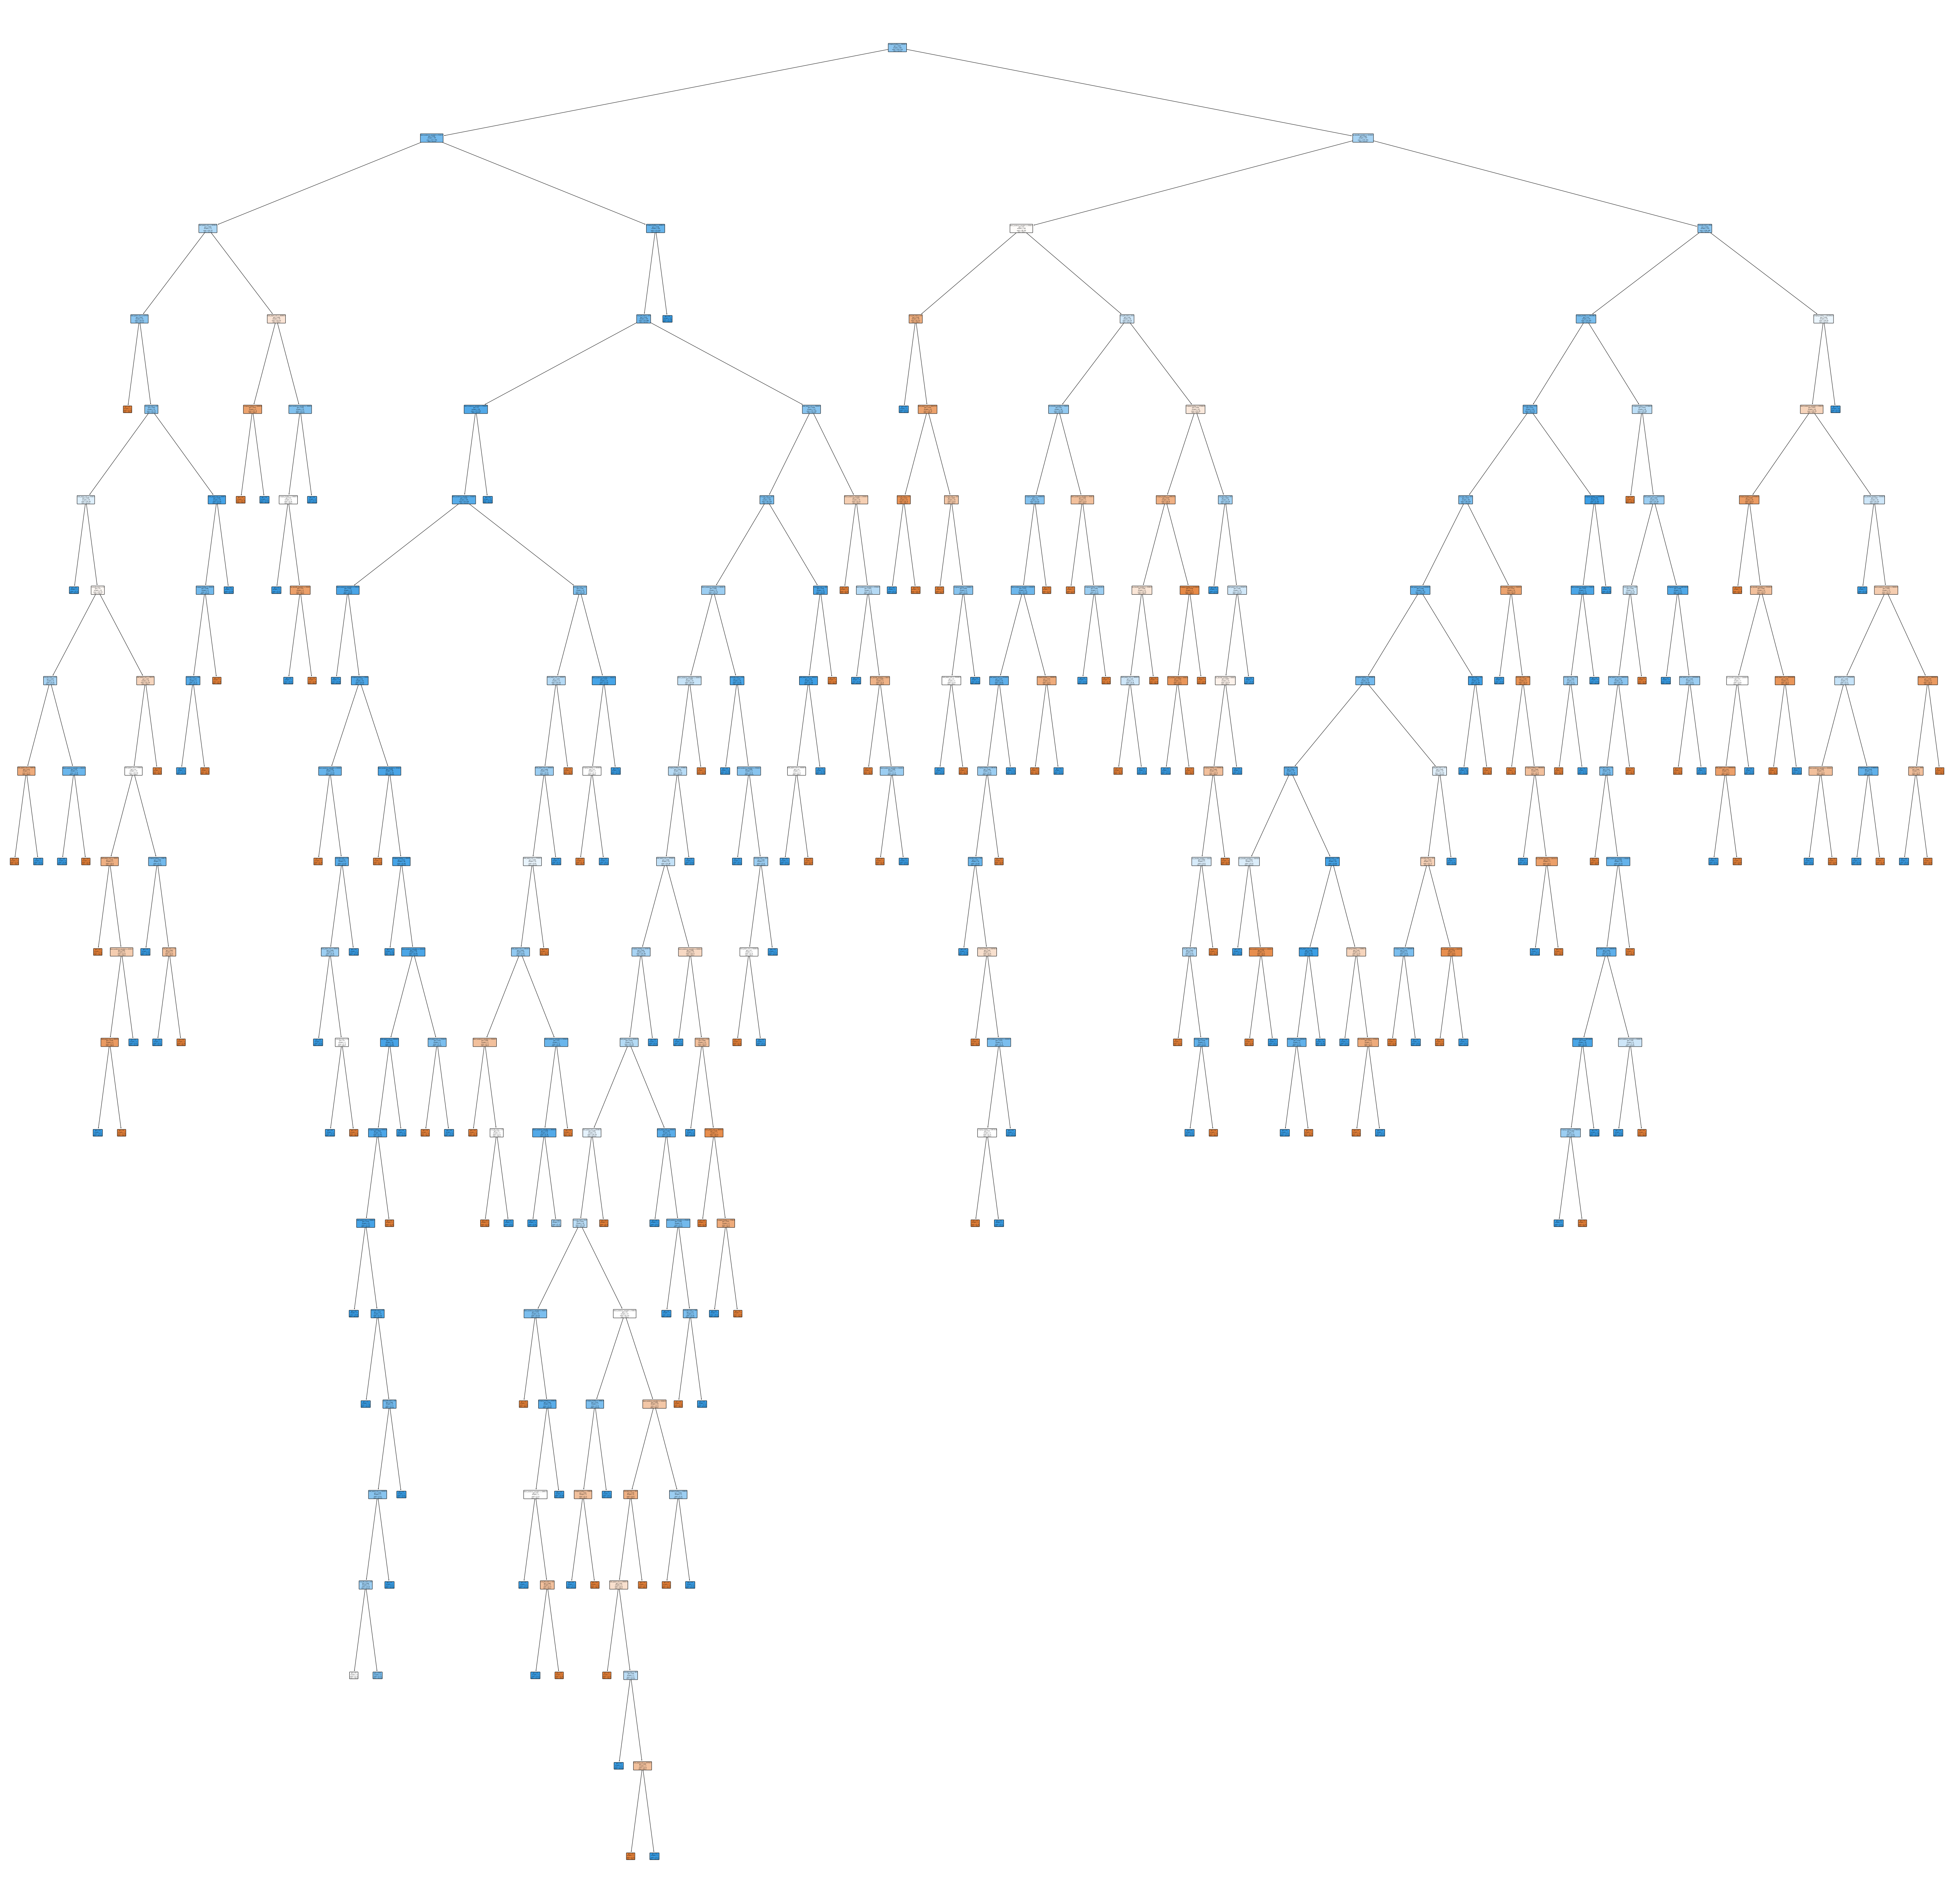

In [44]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(100,100))
plot_tree(tree_clf.estimators_[0], 
          feature_names=X_df.columns,
          class_names=['failure', 'success'], 
          filled=True, impurity=True, 
          rounded=True)
plt.savefig('out.pdf')